#Analysis of Wuthering Heights and Frankenstein Using Python
By: Lucy Daro, Hyounkyu Kang, Shane Shin, and David Almonte

In [46]:
from datascience import *
from datascience.predicates import are
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())
nltk.download('punkt')
from urllib.request import urlopen 
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Introduction

We chose to analyze Emily Bronte's  *Wuthering Heights*  and Mary Shelley's *Frankenstein* because they were written around the same time, but are different enough in content to provide us opportunity for interesting analysis. Our original question asked about the emotion expressed in each of the books. We were curious if a book with more active characters would also express more emotion because the characters would likely be the ones expressing the emotion. We knew that *Frankenstein* had more characters, but we wanted to find out if more of those characters were more involved in the story than those in *Wuthering Heights*. Furthermore, if *Frankenstein* did indeed have more active characters, did *Frankenstein* also have more emotional sentences? Finally, we wondered if the amount of emotion expressed in a book would relate to the gender representation. We predicted that if *Frankenstein* did indeed have more emotional expression, it would also have more female representation. The following essay and code describe our attempts to answer these questions using Python.

Import book text files from www.gutenburg.org

In [0]:
#Reading two books!

wuthering_url='http://www.gutenberg.org/cache/epub/768/pg768.txt'
wuthering_txt=read_url(wuthering_url)
wuthering_chapters = wuthering_txt.split('CHAPTER ')[1:34]

franken_url='https://www.gutenberg.org/files/84/84-0.txt'
franken_txt=read_url(franken_url)
franken_chapters = franken_txt.split('Chapter ')[25:]

Divide books into chapters

We encountered some problems in this step because we couldn't figure out how to index the split appropriately. We learned to not include the table of contents by starting the index at a higher number.

In [48]:
#Display the chapters of Wuthering Heights in a table.

Table().with_column('Chapters', wuthering_chapters)

Chapters
I 1801.--I have just returned from a visit to my landlor ...
II Yesterday afternoon set in misty and cold. I had half ...
"III While leading the way upstairs, she recommended that ..."
"IV What vain weathercocks we are! I, who had determined ..."
V In the course of time Mr. Earnshaw began to fail. He h ...
VI Mr. Hindley came home to the funeral; and--a thing th ...
VII Cathy stayed at Thrushcross Grange five weeks: till ...
VIII On the morning of a fine June day my first bonny li ...
"IX He entered, vociferating oaths dreadful to hear; and ..."
X A charming introduction to a hermit's life! Four weeks ...


In [49]:
#Display the chapters of Frankenstein in a table.
Table().with_column('Chapters', franken_chapters)

Chapters
"1 I am by birth a Genevese, and my family is one of the ..."
2 We were brought up together; there was not quite a yea ...
3 When I had attained the age of seventeen my parents re ...
"4 From this day natural philosophy, and particularly che ..."
5 It was on a dreary night of November that I beheld the ...
6 Clerval then put the following letter into my hands. I ...
"7 On my return, I found the following letter from my fat ..."
"8 We passed a few sad hours until eleven o’clock, when t ..."
"9 Nothing is more painful to the human mind than, after ..."
10 I spent the following day roaming through the valley. ...


###1. Analyzing Character Appearance in the Books

To answer our first question about emotion expressed compared to number of characters, we first needed to look at the characters within each book. After some simple research, we determined *Frankenstein* had more main characters than *Wuthering Heights*, but we needed some more complicated code to see how involved these characters actually were in each book. 

We first created dictionaries that included the main characters from each book. Then, we used the dictionaries to make tables that tracked the number of times their names appears in each chapter. We had some difficulty finding the correct name to call each character. For example, Alphonse Frankenstein is the name of the narrator's father in *Frankenstein*, so he was never referred to as Alphonse. Rather, whenever he was mentioned in the story, the narrator calles him "my father." So, we had to change our code to reflect this observation. We also encountered a problem with the character Victor Frankenstein, since he is the narrator in the story. We could count all mentions of his name, but this did not accurately represent his involvement in the story since he was telling the story. We considered instead counting the number of appearances of the word "I," or whenever the narrator referred to himself. However, this would be innaccurate because whenever the word "I" appeared in dialogue it would mess up the count. We decided to just keep the code the way it was because as the narrator, Victor Frankenstein is effectively involved in every part of the story, so we would keep that fact in mind in our future analyses.

The counting of characters in *Wuthering Heights* went much more smoothly. We were able to check our work for both books by using the search function on the actual text files from gutenburg.org in different chapters and seeing if the numbers reported in the code output matched those that we counted. They did match, so we concluded our coding was correct. 

By looking at the graphs that our code produced, we saw that our original thoughts were correct. *Wuthering Heights* had only two characters that were mentioned a lot, while the other characters were much less involved in the story. *Frankenstein*, on the other hand, had many characters who were mentioned a similar number of times compared to each other. We used this information as we continued with our analysis. 

###Characters in Wuthering Heights:

Heathcliff

Catherine

Edgar Linton

Nelly Dean

Lockwood

Hareton Earnshaw

###Characters in Frankenstein

The Monster

Victor Frankenstien

Robert Walton

Alphonse Frankenstien

Elizabeth Lavenza

Henry Clervel

Wiliam Frankenstien

Justine Moritz


In [0]:
# Create dictionary with Wuthering Heights character names
wuthering_people = ['Heathcliff', 'Catherine', 'Edgar', 'Nelly', 'Lockwood']
wuthering_counts = {pp: np.char.count(wuthering_chapters, pp) for pp in wuthering_people}

In [51]:
# Table for Wuthering Heights Characters
wuthering_counts_tab = Table().with_columns([
        'Heathcliff', wuthering_counts['Heathcliff'],
        'Catherine', wuthering_counts['Catherine'],
        'Edgar', wuthering_counts['Edgar'],
        'Nelly', wuthering_counts['Nelly'],
        'Lockwood', wuthering_counts['Lockwood']
])

print(wuthering_counts_tab)


Heathcliff | Catherine | Edgar | Nelly | Lockwood
8          | 0         | 0     | 0     | 3
24         | 0         | 0     | 0     | 0
21         | 14        | 0     | 0     | 2
14         | 4         | 0     | 0     | 0
6          | 3         | 0     | 0     | 0
9          | 10        | 6     | 5     | 1
19         | 12        | 6     | 2     | 2
12         | 18        | 9     | 3     | 0
27         | 21        | 12    | 14    | 0
43         | 23        | 14    | 9     | 1
... (23 rows omitted)


Text(0.5,1,'Cumulative Number of Times Name Appears')

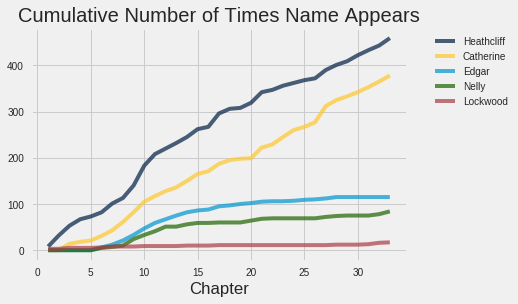

In [52]:
#Create graph with cumulative character counts for Frankenstein
cum_counts = wuthering_counts_tab.cumsum().with_column('Chapter', np.arange(1, 34, 1))
cum_counts.plot(column_for_xticks=5)
plt.title('Cumulative Number of Times Name Appears')

In [0]:
# Create dictionary with Frankenstein character names
franken_people = ['monster', 'Victor', 'Walton', 'my father', 'Elizabeth', 'Henry', 'William', 'Justine']
franken_counts = {pp: np.char.count(franken_chapters, pp) for pp in franken_people}

In [54]:
# Table for Frankenstein Characters
franken_counts_tab = Table().with_columns([
        'Monster', franken_counts['monster'],
        'Victor Frankenstein', franken_counts['Victor'],
        'Robert Walton', franken_counts['Walton'],
        'Alphonse Frankenstein', franken_counts['my father'],
        'Elizabeth Lavenza', franken_counts['Elizabeth'],
        'Henry Clervel', franken_counts['Henry'],
        'Wiliam Frankenstien', franken_counts['William'],
        'Justine Moritz', franken_counts['Justine']
])

print(franken_counts_tab)

Monster | Victor Frankenstein | Robert Walton | Alphonse Frankenstein | Elizabeth Lavenza | Henry Clervel | Wiliam Frankenstien | Justine Moritz
0       | 1                   | 0             | 8                     | 4                 | 0             | 0                   | 0
0       | 1                   | 0             | 3                     | 2                 | 1             | 0                   | 0
0       | 0                   | 0             | 4                     | 7                 | 1             | 0                   | 0
0       | 0                   | 0             | 4                     | 0                 | 0             | 0                   | 0
4       | 1                   | 0             | 4                     | 4                 | 5             | 0                   | 0
0       | 3                   | 0             | 0                     | 3                 | 5             | 1                   | 12
0       | 8                   | 0             | 9             

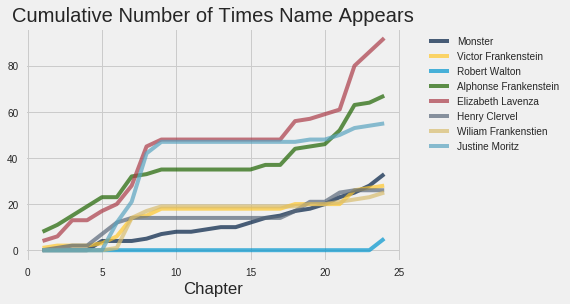

In [55]:
#Create graph with cumulative character counts for Wuthering Heights
cum_counts = franken_counts_tab.cumsum().with_column('Chapter', np.arange(1, 25, 1))
cum_counts.plot(column_for_xticks=8)
plt.title('Cumulative Number of Times Name Appears');

###2. Analyzing Emotion Compared to Lenght of Chapter

Once we understood the character involvement throughout the chapters of each book, we wanted to look at the emotion expressed in the books compared to the chapter length. We chose to look at the number of sentences that end in question marks or exclamation points because we figured those sentences expressed the most emotion.

First, we compared the the number of characters (as in letters, not to be confused with person characters/protagonists), questions marks, and quotation marks across chapters of *Wuthering Heights* and *Frankenstein* by creating tables. By looking at the tables, we found that our prediction, which was that there would be more emotions expressed in *Frankenstein*, was false. In fact, there were more emotions expressed, which means more quotation and exclamation marks,  in *Wuthering Heights*. One reason this could be the case is that *Wuthering Heights* is more of a romance novel, and *Frankenstein* is a story about a monster.

We then decided to make graphs so we could better visualize the comparison. Furthermore, we wanted to look at the relationship between the length of a chapter and the emotions (questions and exclamations) expressed. By assigning the color red to represent Wuthering Heights and color blue to Frankenstein, we were able to examine both of the books in the same graph. We noticed a positive correlation in both cases; the longer the chapter, the more emotions expressed. We also saw that *Wuthering Heights* has more emotions expressed, again likely because of the romantic inclinations of the novel.

In [0]:
#Count the number of characters/question marks across chapters.
chars_question_Wuthering = Table().with_columns([
        'Wuthering Chapter Length', [len(s) for s in wuthering_chapters],
        'Number of Question Marks', np.char.count(wuthering_chapters, '?')
    ])
chars_question_Frankenstein = Table().with_columns([
        'Frankenstein Chapter Length', [len(s) for s in franken_chapters],
        'Number of Question Marks', np.char.count(franken_chapters, '?')
    ])


In [0]:
#Count the number of characters/exclamation marks across chapters. 
chars_exclamation_Wuthering = Table().with_columns([
        'Wuthering Chapter Length', [len(s) for s in wuthering_chapters],
        'Number of Exclamation Marks', np.char.count(wuthering_chapters, '!')
    ])
chars_exclamation_Frankenstein = Table().with_columns([
        'Frankenstein Chapter Length', [len(s) for s in franken_chapters],
        'Number of Exclamation Marks', np.char.count(franken_chapters, '!')
    ])


In [144]:
#The character/question marks counts for Wuthering Heights
chars_question_Wuthering

Wuthering Chapter Length,Number of Question Marks
11235,6
18889,26
27220,17
14611,20
7688,2
14545,21
22309,14
19043,23
33234,43
35658,59


In [59]:
#The character/question marks counts for Frankenstein
chars_question_Frankenstein

Frankenstein Chapter Length,Number of Question Marks
10135,0
12682,1
15241,5
14406,2
12943,10
15477,2
19789,22
17229,16
12416,7
12944,12


In [60]:
#The character/exclamation marks counts for Wuthering Heights
chars_exclamation_Wuthering

Wuthering Chapter Length,Number of Exclamation Marks
11235,7
18889,38
27220,60
14611,20
7688,3
14545,29
22309,28
19043,35
33234,101
35658,86


In [61]:
#The character/exclamation marks counts for Frankenstein
chars_exclamation_Frankenstein

Frankenstein Chapter Length,Number of Exclamation Marks
10135,0
12682,3
15241,3
14406,0
12943,11
15477,9
19789,36
17229,21
12416,3
12944,17


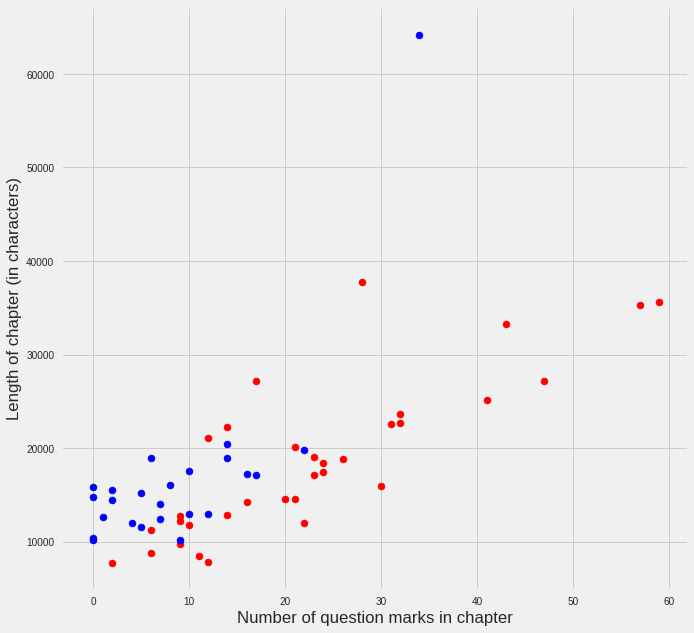

In [145]:
#Graph of number of question marks vs length chapter
plt.figure(figsize=(10,10))
plt.scatter(chars_question_Wuthering[1], chars_question_Wuthering[0], color='red')
plt.scatter(chars_question_Frankenstein[1], chars_question_Frankenstein[0], color='blue')
plt.xlabel('Number of question marks in chapter')
plt.ylabel('Length of chapter (in characters)');

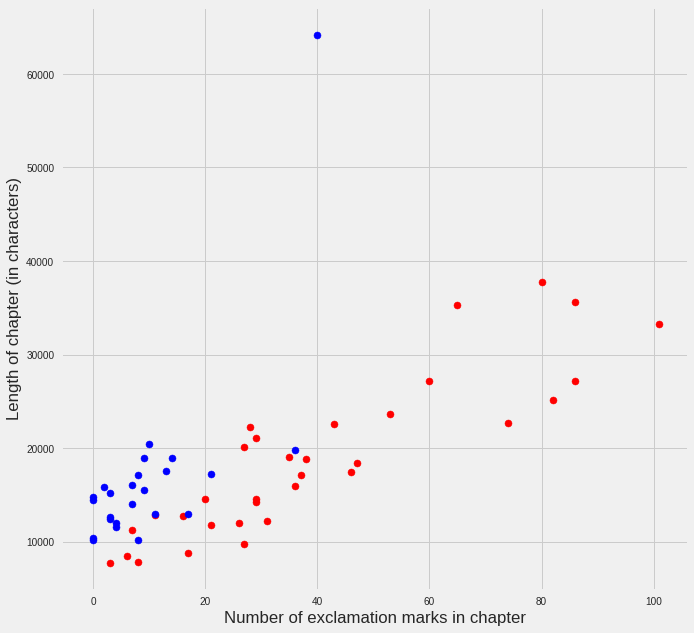

In [146]:
#Graph of number of exclamation marks vs number of characters in chapter
plt.figure(figsize=(10,10))
plt.scatter(chars_exclamation_Wuthering[1], chars_exclamation_Wuthering[0], color='red')
plt.scatter(chars_exclamation_Frankenstein[1], chars_exclamation_Frankenstein[0], color='blue')
plt.xlabel('Number of exclamation marks in chapter')
plt.ylabel('Length of chapter (in characters)');

###3. Analyzing the Frequency of Gender Pronouns in Chapters

Our third question asked about female representation in each of the books. We thought that, perhaps, a book with more emotional expression would have more female representation because of the stereotype that girls are more emotional. We chose to count the number of gendered pronouns in each book to illustrate the gender representation. We figured a book with more "she/her" appearances would have more female representation, and vice versa for "he/him."

To make our graphs, we first compiled lists of all the occurrences of each of the pronouns for each chapter. By printing the counts, we could see the number of appearances of each pronoun for each chapter. We tested our code by using the search function in the actual text file for the words "she/her" for the first chapter in *Frankenstein*. Since the count was 48, we knew our code worked. Then, we used our cumulative counts to make graphs for each gender pronouns for each book.

We noticed that while both books have significantly more male pronouns than female pronouns, *Wuthering Heights* has comparatively more female pronouns than *Frankenstein*. This supported our original hypothesis that a book with more emotional expression would have comparatively more female representation.

In [0]:
#Counts of words in each Wuthering Heights chapter
p=re.compile('she|her|She|Her') #This could be any words/
wu_she=list()
wuthering_chapters = wuthering_txt.split('CHAPTER ')[1:34]
for i in wuthering_chapters:
    m=p.findall(i)
    wu_she.append(m)
wu_she_counts=list()
for i in wu_she:
    wu_she_counts.append(len(i))
    
t=re.compile('he|him|He|Him') #This could be any words/
wu_he=list()
wuthering_chapters = wuthering_txt.split('CHAPTER ')[1:34]
for i in wuthering_chapters:
    m=t.findall(i)
    wu_he.append(m)
wu_he_counts=list()
for i in wu_he:
    wu_he_counts.append(len(i))


In [67]:
print(wu_he_counts)
print(wu_she_counts)

[230, 432, 604, 393, 233, 440, 539, 510, 885, 909, 542, 688, 534, 435, 457, 266, 924, 554, 244, 311, 912, 275, 396, 501, 196, 185, 565, 436, 332, 369, 294, 564, 442]
[48, 125, 132, 95, 80, 133, 147, 207, 286, 309, 155, 276, 115, 212, 186, 82, 202, 214, 68, 66, 322, 106, 139, 138, 68, 64, 199, 185, 104, 170, 103, 208, 154]


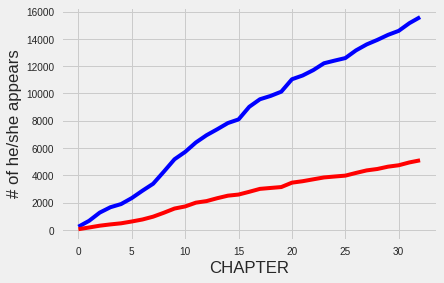

In [68]:
#Create graphs for gender pronouns in Wuthering Heights
cum_he=np.cumsum(wu_he_counts)
cum_she=np.cumsum(wu_she_counts)
plt.plot(cum_he,'b',label='# of he appears')
plt.plot(cum_she,'r',label='# of she appears')
plt.xlabel('CHAPTER')
plt.ylabel('# of he/she appears')
plt.grid(True)

In [0]:
#Counts of words in each Frankenstein chapter
p=re.compile('she|her|She|Her')
fr_she=list()
franken_chapters = franken_txt.split('Chapter ')[25:]
for i in franken_chapters:
    m=p.findall(i)
    fr_she.append(m)
fr_she_counts=list()
for i in fr_she:
    fr_she_counts.append(len(i))
    
t=re.compile('he|him|He|Him')
fr_he=list()
franken_chapters = franken_txt.split('Chapter ')[24:]
for i in franken_chapters:
    m=t.findall(i)
    fr_he.append(m)
fr_he_counts=list()
for i in wu_he:
    fr_he_counts.append(len(i))

In [141]:
print(fr_he_counts)
print(fr_she_counts)

[230, 432, 604, 393, 233, 440, 539, 510, 885, 909, 542, 688, 534, 435, 457, 266, 924, 554, 244, 311, 912, 275, 396, 501, 196, 185, 565, 436, 332, 369, 294, 564, 442]
[116, 43, 79, 28, 30, 89, 102, 168, 53, 24, 54, 30, 68, 78, 36, 55, 14, 45, 33, 50, 59, 86, 55, 110]


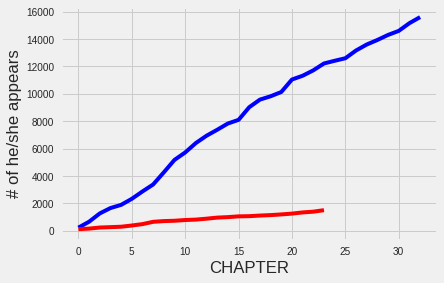

In [142]:
#Create graphs for gender pronouns in Frankenstein
cum_he=np.cumsum(fr_he_counts)
cum_she=np.cumsum(fr_she_counts)
plt.plot(cum_he,'b',label='# of he appears')
plt.plot(cum_she,'r',label='# of she appears')
plt.xlabel('CHAPTER')
plt.ylabel('# of he/she appears')
plt.grid(True)

###Happy Words

  Lastly, we decided to compare how many positive words appeared in books. Rather than randomly selecting word list, we web-scraped a word list of 100 happy words and match to each book. Happy word list contains words like laughter, happiness, love, and so on. First, we compared which book has more happy words. Our results found that, *Wuthering Heights* contains 64 matches, happy wordst than Frankenstein, which contains 57 happy words. Next, we created a dictionary that is composed of word as key, and word counts in the book as value. In Wuthering, 'Wonderful' appeared the most, and 'Win' appeared the least, whereas 'Wonderful' the most, and 'Attraction' the least in Frankenstein.

In [0]:
#Web Scraping 'Happy word' from google
from bs4 import BeautifulSoup
import requests
url='https://www.laughteronlineuniversity.com/top-100-happy-words/'
q=requests.get(url)
html_doc=q.text
td_list=list()
soup=BeautifulSoup(html_doc,'html.parser')
tr_tags=soup.find_all('tr')
for td in tr_tags:
    if isinstance(td.text,str):
        td_list.append(td.text)
happyword=list()
for i in td_list:
    happyword.append(i.split('\n')[1])
happyword=happyword[1:]
#We got the happy word lists from google, Now let's match to our books

In [95]:
print(happyword)
len(happyword)

['laughter', 'happiness', 'love', 'happy', 'laughed', 'laugh', 'laughing', 'excellent', 'laughs', 'joy', 'successful', 'win', 'rainbow', 'smile', 'won', 'pleasure', 'smiled', 'rainbows', 'winning', 'celebration', 'enjoyed', 'healthy', 'music', 'celebrating', 'congratulations', 'weekend', 'celebrate', 'comedy', 'jokes', 'rich', 'victory', 'christmas', 'free', 'friendship', 'fun', 'holidays', 'loved', 'loves', 'loving', 'beach', 'hahaha', 'kissing', 'sunshine', 'beautiful', 'delicious', 'friends', 'funny', 'outstanding', 'paradise', 'sweetest', 'vacation', 'butterflies', 'freedom', 'flower', 'great', 'sunlight', 'sweetheart', 'sweetness', 'award', 'chocolate', 'hahahaha', 'heaven', 'peace', 'splendid', 'success', 'enjoying', 'kissed', 'attraction', 'celebrated', 'hero', 'hugs', 'positive', 'sun', 'birthday', 'blessed', 'fantastic', 'winner', 'delight', 'beauty', 'butterfly', 'entertainment', 'funniest', 'honesty', 'sky', 'smiles', 'succeed', 'wonderful', 'glorious', 'kisses', 'promotion'

100

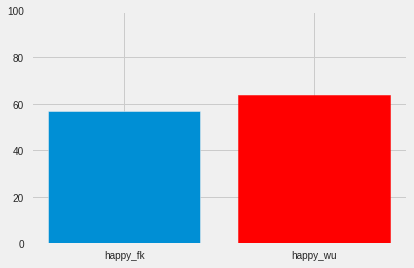

[64, 57]


In [115]:
from nltk.tokenize import word_tokenize

tokens_wu=word_tokenize(wuthering_txt)
happy_wu=0
for word in happyword:
  if word in tokens_wu:
    happy_wu+=1

tokens_frankens=word_tokenize(franken_txt)
happy_fk=0
for word in happyword:
  if word in tokens_frankens:
    happy_fk+=1

countss=[happy_wu,happy_fk]

x=['happy_wu','happy_fk']
low = min(countss)
high = max(countss)
plt.ylim(0,100,1)
barlist=plt.bar(x,countss) 
barlist[0].set_color('r')
plt.show()
print(countss)

<Container object of 100 artists>

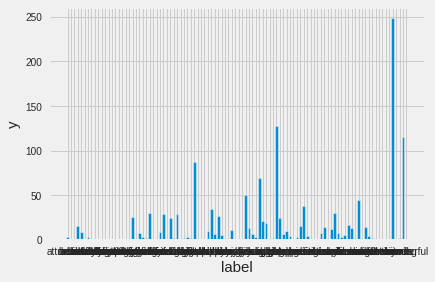

In [111]:
# Create dictionary with happywords and number of matches to each chapters
happyword_count_wu = {word: np.char.count(wuthering_txt, word) for word in happyword}

#Which word appears the most?
data = {"x":[], "y":[]}
for label, coord in happyword_count.items():
    data["x"].append(label)
    sum=np.sum(coord)
    data['y'].append(sum)
plt.xlabel('label', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.bar(data['x'],data['y'])



In [0]:
##Word most and least appear in Wuthering
max(happyword_count_wu) #-wonderful
min(happyword_count_wu) #-win

<Container object of 100 artists>

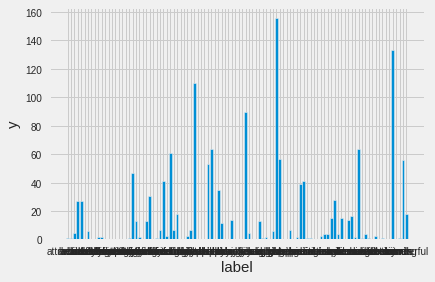

In [116]:
happyword_count_fk = {word: np.char.count(franken_txt, word) for word in happyword}
#Which word appears the most?
data = {"x":[], "y":[]}
for label, coord in happyword_count_fk.items():
    data["x"].append(label)
    sum=np.sum(coord)
    data['y'].append(sum)
plt.xlabel('label', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.bar(data['x'],data['y'])

In [119]:
max(happyword_count_fk) #-wonderful
min(happyword_count_fk) #-attraction

'wonderful'

###Conclusion

Overall, we were able to answer all of our questions with Python! We learned that while *Frankenstein* had more active characters, *Wuthering Heights* had more emotional expressions. We also learned that *Wuthering Heights* had more female representation compared to *Frankenstein*. However, more importantly, we learned how to use Python to quantitatively answer qualitative questions. We had to try different methods to answer our questions, but ultimately chose those displayed in this notebook because we felt they best addressed the questions we asked. 

In [3]:
nbconvert --to html 385-book-project.ipynb

SyntaxError: ignored